# INFO 2950: Phase IV
#### Group Members: Anusha Bishayee, Katheryn Ding

---
### __Introduction:__  

#### How do ESG score and stock performance (price) align across different industries? What associations can we find between company industry, stock performance, and ESG ratings?
#### note: ESG score refers to a quantiative metric measuring a company's environmental, social, and governance performance; 'environmental' pertains to aspects like waste management and energy emissions, 'social' pertains to aspects like customer satisfaction and DEI in the workplace, and 'governance' pertains to aspects like operating efficiencies and risk management. ESG scores are typically examined by independent investors, business analysts, and even competitior companies to assess risk or opportunities associated with a specific company's practices.



---
### __Data Collection and Cleaning:__

In [1]:
import contextlib
import os
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import yfinance as yf
from scipy import stats
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, root_mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import norm

---
### __Data Cleaning__

the data cleaning work that produces these csvs is found here: https://github.com/anushabishayee/info2950_finalproject/blob/main/data_cleaning.ipynb.

Generally, we imported the yfinance library, downloaded the Kaggle csv with the company ESG data, cleaned the dataset for NaNs and unneeded values, and reformatted some date values for ease of manipulation. Then, we joined the ESG data to the yfinance stock data, matching on company ticker (we created 4 new stock metric columns), and dropped NaNs for the creation of merged_df. For the 2nd dataset (sample_companies), we stratified and randomly selected 30 specific companies from this main dataset (specific methodology is outlined above in the 'Data Collection and Cleaning' section. For the 3rd dataset, we extracted the data straight from the yfinance library, and calculated a rate of change variable for the stock change as well for sp500.

In [2]:
avg_esg_by_industry = pd.read_csv("avg_esg_by_industry.csv")
sp500 = pd.read_csv("sp500.csv")
merged_df = pd.read_csv("merged_df.csv")
sample_companies = pd.read_csv("sample_companies.csv")

---
### __Data Description__
1) Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted on Github, in a Cornell Google Drive or Cornell Box).

- We have 3 main datasets: 1 main dataset (merged_df), 1 "sample" dataset that selects 30 rows from this main dataset (sample_companies), and 1 additional dataset (sp500). Our raw data for the first 2 datasets can be found on Kaggle, here: https://github.com/anushabishayee/info2950_finalproject/blob/main/raw%20data/esg%20kaggle%20csv%20link and the actual csv is here: https://github.com/anushabishayee/info2950_finalproject/blob/main/esg_data.csv.
- Even more specifically, the Kaggle author states that they pulled the data for their csv from multiple APIs, like ESG Enterprise, a publicly-available API. They grabbed financial and company data from Finnhub. 3 of these links can be found here: https://github.com/anushabishayee/info2950_finalproject/blob/main/raw%20data/esg%20kaggle%20source%20data%20links.
- The finance data that the 3rd dataset is comprised of, and the finance data that is joined to the 1st and 2nd datasets is found in the yfinance library in Python (Yahoo Finance data, https://github.com/anushabishayee/info2950_finalproject/blob/main/raw%20data/yfinance%20links).

***

2) If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?

- Individuals are not involved in the data directly, as each observation corresponds to an entire company.

***

3) What preprocessing was done, and how did the data come to be in the form that you are using?

- Our preprocessing of these datasets is detailed above. Generally, we imported the yfinance library, downloaded the Kaggle csv with the company ESG data, cleaned the dataset for NaNs and unneeded values, and reformatted some date values for ease of manipulation. Then, we joined the ESG data to the yfinance stock data, matching on company ticker (we created 4 new stock metric columns), and dropped NaNs for the creation of merged_df. For the 2nd dataset (sample_companies), we stratified and randomly selected 30 specific companies from this main dataset (specific methodology is outlined above in the 'Data Collection and Cleaning' section. For the 3rd dataset, we extracted the data straight from the yfinance library, and calculated a rate of change variable for the stock change as well for sp500.
- For the Kaggle csv, the author notes that they used company stock ticker as a unique identifier, then pulled and collated data from various APIs. in specific, they utilized ESG Enterprise (https://www.esgenterprise.com/), a publicly-available API, and pulled their ratings methodology from https://app.esgenterprise.com/uploads/ESG-Enterprise-Risk-Ratings-MethodologyV3.pdf. They grabbed financial and company data from Finnhub (https://finnhub.io/).

***

4) What processes might have influenced what data was observed and recorded and what was not?

- For the ESG data, the Kaggle author of the csv specifically mentioned that only mid/large-cap companies are included, so this influences the specific companies that are recorded in the initial data - smaller companies (that also might have an ESG score) will not be 'observed' here. The author pulled data from ESG Enterprise and Finnhub, so any companies that do not have data available there will not be observed in the dataset. We also dropped any company that had a NaN or blank column value for the ESG columns, and dropped any company that didn't have stock data available in Yahoo Finance (or had NaNs for any specific finance column).

***

5) Who funded the creation of the dataset?

- We created these 3 analysis-ready datasets from two data sources: a 'Public Company ESG Ratings Dataset' Kaggle dataset from user Alistair King (https://www.kaggle.com/alistairking), a New York-based Kaggle Datasets Grandmaster, as well as the yfinance Python library, created by Ran Aroussi (https://aroussi.com/) as a way around the 2017 Yahoo Finance API deprecation. It is unclear if these datasets were 'funded', but their organization and accumulation were spearheaded by the two aforementioned people, respectively.

***

6) Why was this dataset created?
- We formulated our main analysis-ready dataset (merged_df) to examine associations between some of the largest USD-utilizing companies' ESG scores and their stock performances (as well as industry-specific analyses). Then, we formulated our sample dataset (sample_companies) so that we could take a look at some company-level analyses of the general data and research question (620 companies are kinda hard to visualize simultaneously). Finally, we formulated the sp500 dataset so that we could contrast company stock performance from the specified range of 2/1/21 - 12/31/22 to the overall performance of the S&P 500. (the rationale for the range of 2/1/21 - 12/31/22 is mentioned above, it's due to the fact that most companies have a 'last processing date' of February 2022 - Novermber 2022 for their ESG score.)
- The original ESG csv was created and uploaded by Kaggle user Alistair King, perhaps for personal enrichment or curiosity (they do have a Kaggle Datasets Grandmaster rank, so perhaps they just enjoy creating and uploading datasets). The original yfinance Python library was created by Ran Aroussi to have a simple way to download historical market data from Yahoo Finance, due to the Yahoo Finance API deprecation.

***

7) What are the observations (rows) and attributes (columns)?
- For the S&P 500 dataset (sp500), the rows each correspond to a specific date where the S&P 500 was measured, within the range from 2/1/21 - 12/31/22. The columns for this dataset are Start Price, End Price, and Rate of Change (aka the starting price of the S&P 500 when the US market opened on a specific day, the ending price of the S&P 500 when the US market closed on the same specific day, and the percentage change that this stock exhibited between the start and close times of that specific day (100 * (end price - start price) / start price)).

- For both the merged_df and sample_companies dataset, each row corresponds to an unique, mid- to large-cap company that is publicly-traded and utilizes USD. merged_df, our main dataset, has 620 companies, while sample_companies has 30 companies for now. merged_df and sample_companies have the same columns, they are:
+ ticker - a unique combo of letters and numbers that represent a particular stock
+ name - the official name of the company
+ currency - the currency the company is traded in (this was filtered to only be USD)
+ exchange - what market the company is exchanged on
+ industry - the type of output the company produces
+ logo - a link to the company logo, potentially for joining with other datasets (MIGHT BE DROPPED LATER)
+ weburl - a link to the company website, potentially for joining with other datasets or scraping for text sentiment analysis (MIGHT BE DROPPED LATER)
+ environment_grade - a letter score given to the company that measures how well it complies to environmental standards, ranging from AAA being the best to CCC being the worst
+ environment_level - a categorical classification of a company's overall environmental performance (low, medium, high)
+ social_grade - a letter score given to the company that measures how well it complies to social standards, ranging from AAA being the best to CCC being the worst
+ social_level - a categorical classification of a company's overall social performance (low, medium, high)
+ governance_grade - a letter score given to the company that measures how well it complies to governance standards, ranging from AAA being the best to CCC being the worst
+ governance_level - a categorical classification of a company's overall governance performance (low, medium, high)
+ environment_score - a numerical measure of how well a company performs on environment-related factors, ranging from 0-1000
+ social_score - a numerical measure of how well a company performs on social-related factors, ranging from 0-1000
+ governance_score - a numerical measure of how well a company performs on governance-related factors, ranging from 0-1000
+ total_score - a numerical measure of how well a company performs on environment, social, and governance-related factors, ranging from 0-1500]
+ cik - central index key, a unique identifier assigned by the SEC to any company that files documents with the SEC (MIGHT BE DROPPED LATER)
the following columns are ones that we created, using the yfinance data:
+ percent_change - the percent change in the company stock price from close time on 2/1/21 to close time on 12/31/22 (100 * (end price - start price) / start price))
+ start_close - the closing price of the company stock on 2/1/21
+ end_close - the closing price of the company stock on 12/31/22
+ volatility - standard deviation of daily returns of the company stock, aka the percentage change in the stock price from day to day (indicator of how much stock price fluctuates in a given period, higher volatility is riskier, lower volatility has more stability). specifically, daily return is calculated by closing price on day x+1 - closing price on day x divided by closing price on day x, so all daily returns in the time period 2/1/21-12/31/22 are calculated for the specific company stock, and then the standard deviation is taken to get the volatility
+ 50_day_SMA - 50 day simple moving average, or the sum of closing price of a company stock for the last 50 days before 12/31/22, divided by 50 (if current stock price is above the 50-day SMA, the company is in uptrend, and vice versa)
+ cumulative_return - cumulative return of the company stock over the entire period ((close price on 12/31/22 / close price on 2/1/21) - 1), positive values represent returns, and negative values represent losses


## Preregistration Statements

#### Hypothesis 1: 
Industries with higher total ESG scores will have generally better stock performances.

#### Analysis 1: 
According to La Torre, Mango, Cafaro, and Leo (2020), “panel data analysis demonstrates that the ‘ESG Overall index’ has, in general, a statistically significant and positive impact on returns (on a company level).” We would like to use our dataset to explore if there is statistical evidence showing ESG’s correlation with stock return on an industry level. To achieve this, we will run both Linear Regression and Logistic Regression where we input the average total ESG scores [‘Average Total ESG Score’, from avg_esg_by_industry ] for each industry, and output the expected stock performance (both for the stock rate of change over the time period [percent_change] and the stock 50-Day Simple Moving Average [50_day_SMA], which are two different dimensions illustrating financial / stock performance). In this case, we want to test if βESG > 0 at a significance level of 0.05 - this will be 4 different tests.


### Preregistration Statement 2
#### Hypothesis 2
Industries with "High" ESG levels (defined as total_esg_level='BBB') exhibit a stronger correlation between their stock's rate of change (`percentage_change`) and the total ESG score (`total_score`) compared to industries with "Low" or "Medium" ESG levels (defined as total_esg_level='BB' or total_esg_level='B'). We hypothesize that this pattern will hold across both the full dataset (`merged_df`) and the sample dataset (`sample_companies`).

#### Analysis 2
To evaluate whether ESG score levels are more strongly correlated with stock return rates in industries with higher ESG scores, we will compare the correlation coefficients between stock rate of change (percentage_change) and total ESG score (total_score) for two groups: industries with "High" ESG levels (total_esg_level='BBB') and industries with "Low" or "Medium" ESG levels (total_esg_level='BB' or total_esg_level='B'). This analysis will be performed separately on the full dataset (merged_df) and the sample dataset (sample_companies).

We will first calculate the Pearson correlation coefficients for each group, measuring the strength of the linear relationship between percentage_change and total_score. The null hypothesis states that the correlation coefficient for industries with "High" ESG levels is equal to the correlation coefficient for industries with "Low" or "Medium" ESG levels. The alternative hypothesis is that the correlation coefficient for industries with "High" ESG levels and industries with 'Low' or 'Medium' ESG levels are different.

To test the difference between the two correlation coefficients, we will apply the Fisher Z-transformation, which converts correlation coefficients into z-scores. We will determine whether the difference between the correlation coefficients for the two groups is statistically significant at a 95% confidence level (α=0.05). If the test reveals a significant difference, we will conclude that industries with "High" ESG levels exhibit a different correlation between stock rate of change and total ESG scores compared to industries with "Low" or "Medium" ESG levels. If the difference is not statistically significant, we will fail to reject the null hypothesis. This process will be repeated for both the full dataset (`merged_df`) and the sample dataset (`sample_companies`) to ensure the robustness of the findings.


### Preregistration Statement 3
#### Hypothesis 3:
Industries with "High" ESG levels (defined as total_esg_level='BBB') exhibit a higher average rate of change in stock price compared to industries with "Low" or "Medium" ESG levels (defined as total_esg_level='BB' or total_esg_level='B'). We hypothesize that this trend will hold across the full dataset (`merged_df`).

#### Analysis 3:
Based on the findings from Friede, G., Busch, T., & Bassen, A. (2015), which identify a positive relationship between ESG performance and company performance in over 2,100 studies, we aim to test whether industries with higher ESG levels demonstrate significantly higher rates of change in stock price.

To test this hypothesis, we will divide the dataset into two groups: industries with high ESG levels (total_esg_level='BBB') and industries with low or medium ESG levels (total_esg_level='BB' or total_esg_level='B'). We will calculate the mean rate of change in stock price for both groups and compare them using a one-tailed z-test to determine whether the average rate of change for industries with high ESG levels is significantly greater than that for industries with low or medium ESG levels.

The null hypothesis states that industries with high ESG levels have an equal or lower average rate of change in stock price compared to industries with low or medium ESG levels. The alternative hypothesis states that industries with high ESG levels have a significantly higher average rate of change in stock price. The test will be conducted at a 95% confidence level (α=0.05). If the test result indicates that the difference is statistically significant, we will conclude that industries with high ESG levels exhibit a significantly higher average rate of change in stock price compared to those with low or medium ESG levels. If not, we will fail to reject the null hypothesis.



---
## Data Analysis:



## Analysis 1

In [13]:
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

# Step 1: Aggregate the data at the industry level
industry_data = merged_df.groupby('industry').agg({
    'total_score': 'mean',
    'percentage_change': 'mean',
    '50_day_SMA': 'mean'
}).rename(columns={'total_score': 'average_total_esg_score'})

# Step 2: Standardize the predictor (average_total_esg_score)
scaler = StandardScaler()
industry_data['average_total_esg_score_scaled'] = scaler.fit_transform(industry_data[['average_total_esg_score']])

### Linear Regression for percentage_change ###
X_linear_pc = industry_data[['average_total_esg_score_scaled']]
y_linear_pc = industry_data['percentage_change']
X_linear_pc = sm.add_constant(X_linear_pc)  # Add intercept

linear_model_pc = sm.OLS(y_linear_pc, X_linear_pc).fit()
print("Linear Regression Results for Percentage Change:")
print(linear_model_pc.summary())

### Logistic Regression for percentage_change as binary (above/below median) ###
median_pc = industry_data['percentage_change'].median()
industry_data['PC_performance'] = (industry_data['percentage_change'] > median_pc).astype(int)

X_logistic_pc = industry_data[['average_total_esg_score_scaled']]
y_logistic_pc = industry_data['PC_performance']

logistic_model_pc = LogisticRegression()
logistic_model_pc.fit(X_logistic_pc, y_logistic_pc)

print("Logistic Regression Coefficients for Percentage Change:")
print(f"Intercept: {logistic_model_pc.intercept_[0]}")
print(f"Coefficient for ESG Score: {logistic_model_pc.coef_[0][0]}")

# Classification report for logistic model
y_pred_pc = logistic_model_pc.predict(X_logistic_pc)
print("\nClassification Report for Logistic Regression Model (Percentage Change):")
print(classification_report(y_logistic_pc, y_pred_pc))

### Linear Regression for 50_day_SMA ###
X_linear_sma = industry_data[['average_total_esg_score_scaled']]
y_linear_sma = industry_data['50_day_SMA']
X_linear_sma = sm.add_constant(X_linear_sma)  # Add intercept

linear_model_sma = sm.OLS(y_linear_sma, X_linear_sma).fit()
print("Linear Regression Results for 50-Day SMA:")
print(linear_model_sma.summary())

### Logistic Regression for 50_day_SMA as binary (above/below median) ###
median_sma = industry_data['50_day_SMA'].median()
industry_data['SMA_performance'] = (industry_data['50_day_SMA'] > median_sma).astype(int)

X_logistic_sma = industry_data[['average_total_esg_score_scaled']]
y_logistic_sma = industry_data['SMA_performance']

logistic_model_sma = LogisticRegression()
logistic_model_sma.fit(X_logistic_sma, y_logistic_sma)

print("Logistic Regression Coefficients for 50-Day SMA Performance:")
print(f"Intercept: {logistic_model_sma.intercept_[0]}")
print(f"Coefficient for ESG Score: {logistic_model_sma.coef_[0][0]}")

# Classification report for logistic model
y_pred_sma = logistic_model_sma.predict(X_logistic_sma)
print("\nClassification Report for Logistic Regression Model (50-Day SMA):")
print(classification_report(y_logistic_sma, y_pred_sma))

# Hypothesis Testing for Linear Models
print("\n--- Hypothesis Testing for Linear Regression ---")
for label, model, dependent_var in [
    ("Percentage Change", linear_model_pc, 'percentage_change'),
    ("50-Day SMA", linear_model_sma, '50_day_SMA')
]:
    esg_coefficient = model.params['average_total_esg_score_scaled']
    esg_standard_error = model.bse['average_total_esg_score_scaled']

    # Calculate t-statistic and p-value for one-tailed test
    t_statistic = esg_coefficient / esg_standard_error
    p_value_one_tailed = 1 - stats.t.cdf(t_statistic, df=model.df_resid)

    print(f"\nLinear Regression Test for βESG > 0 ({label})")
    print(f"Dependent Variable: {dependent_var}")
    print(f"ESG Coefficient: {esg_coefficient}")
    print(f"T-statistic: {t_statistic}")
    print(f"One-tailed p-value: {p_value_one_tailed}")

    if p_value_one_tailed < 0.05:
        print(f"Reject the null hypothesis: ESG has a positive effect on {dependent_var}.")
    else:
        print(f"Fail to reject the null hypothesis: No significant positive effect of ESG on {dependent_var}.")

# Hypothesis Testing for Logistic Models
print("\n--- Hypothesis Testing for Logistic Regression ---")
for label, X_logistic, y_logistic in [
    ("Percentage Change", X_logistic_pc, y_logistic_pc),
    ("50-Day SMA", X_logistic_sma, y_logistic_sma)
]:
    X_logistic_sm = sm.add_constant(X_logistic)  # Add intercept for statsmodels
    logit_model = sm.Logit(y_logistic, X_logistic_sm).fit()
    print(logit_model.summary())

    # Extract one-tailed p-value for ESG coefficient
    esg_logit_p_value_one_tailed = logit_model.pvalues['average_total_esg_score_scaled'] / 2
    print(f"\nOne-tailed p-value for ESG coefficient in Logistic Regression ({label}): {esg_logit_p_value_one_tailed}")

    if esg_logit_p_value_one_tailed < 0.05:
        print(f"Reject the null hypothesis: ESG has a positive effect on {label} classification.")
    else:
        print(f"Fail to reject the null hypothesis: No significant positive effect of ESG on {label} classification.")


Linear Regression Results for Percentage Change:
                            OLS Regression Results                            
Dep. Variable:      percentage_change   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     13.07
Date:                Tue, 19 Nov 2024   Prob (F-statistic):           0.000812
Time:                        11:11:05   Log-Likelihood:                -199.69
No. Observations:                  43   AIC:                             403.4
Df Residuals:                      41   BIC:                             406.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

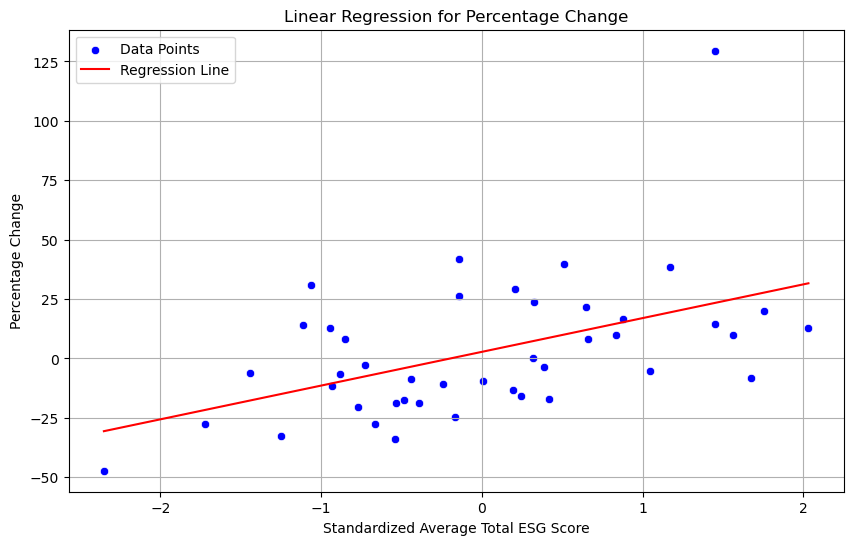

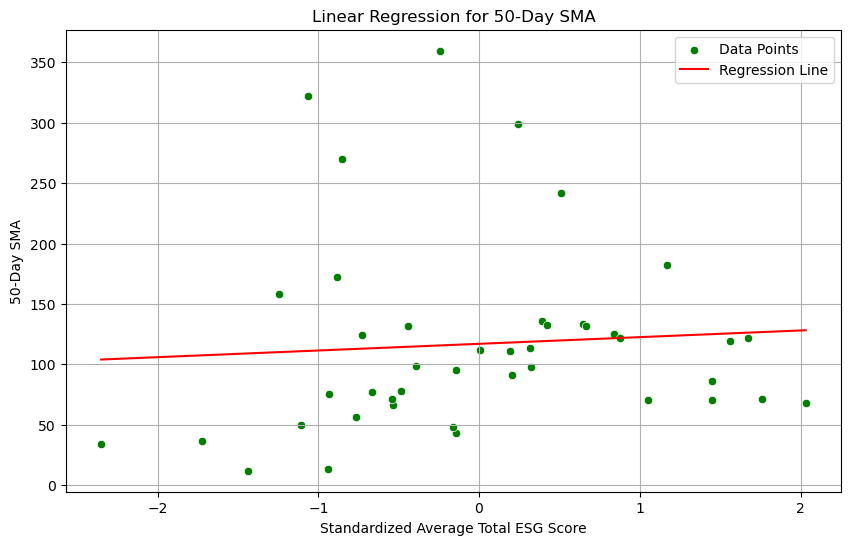

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot with regression line for Percentage Change
plt.figure(figsize=(10, 6))
sns.scatterplot(x=industry_data['average_total_esg_score_scaled'], y=industry_data['percentage_change'], color='blue', label='Data Points')
sns.lineplot(x=industry_data['average_total_esg_score_scaled'], 
             y=linear_model_pc.predict(X_linear_pc), 
             color='red', label='Regression Line')
plt.title('Linear Regression for Percentage Change')
plt.xlabel('Standardized Average Total ESG Score')
plt.ylabel('Percentage Change')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot with regression line for 50-Day SMA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=industry_data['average_total_esg_score_scaled'], y=industry_data['50_day_SMA'], color='green', label='Data Points')
sns.lineplot(x=industry_data['average_total_esg_score_scaled'], 
             y=linear_model_sma.predict(X_linear_sma), 
             color='red', label='Regression Line')
plt.title('Linear Regression for 50-Day SMA')
plt.xlabel('Standardized Average Total ESG Score')
plt.ylabel('50-Day SMA')
plt.legend()
plt.grid(True)
plt.show()


## Analysis 2

In [1]:
# Preregistration Statement 2

#the merged_df
# Step 1: Define the two groups based on ESG levels
pop_high = merged_df[merged_df['total_grade'] == 'BBB']
pop_not_high = merged_df[(merged_df['total_grade'] == 'BB') | (merged_df['total_grade'] == 'B')]

# Correlation between `percentage_change` and `total_score`
pop_r_high = pop_high['percentage_change'].corr(pop_high['total_score'])
pop_r_not_high = pop_not_high['percentage_change'].corr(pop_not_high['total_score'])

# Sample sizes for each group
pop_n_high = pop_high.shape[0]
pop_n_not_high = pop_not_high.shape[0]

#the sample_companies
sample_high = sample_companies[sample_companies['total_grade'] == 'BBB']
sample_not_high = sample_companies[(sample_companies['total_grade'] == 'BB') | (sample_companies['total_grade'] == 'B')]

# Correlation between `percentage_change` and `total_score`
sample_r_high = sample_high['percentage_change'].corr(sample_high['total_score'])
sample_r_not_high = sample_not_high['percentage_change'].corr(sample_not_high['total_score'])

# Sample sizes for each group
sample_n_high = sample_high.shape[0]
sample_n_not_high = sample_not_high.shape[0]



NameError: name 'merged_df' is not defined

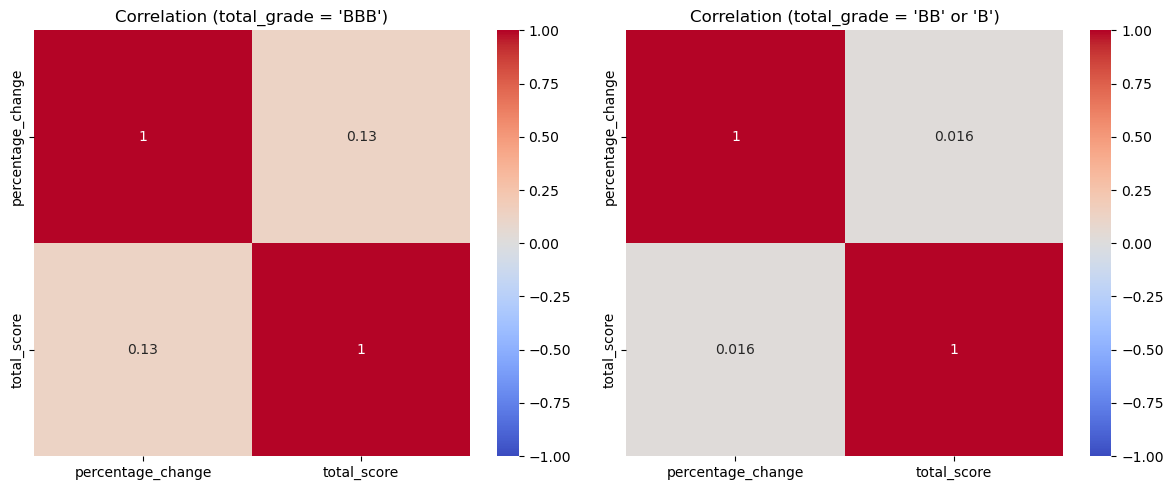

In [5]:
# Correlation plot
corr_bbb = pop_high[["percentage_change", "total_score"]].corr()
corr_bb_b = pop_not_high[["percentage_change", "total_score"]].corr()

# Set up the matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the heatmap for total_grade = 'BBB'
sns.heatmap(corr_bbb, annot=True, cmap="coolwarm", vmin=-1, vmax=1, ax=axes[0])
axes[0].set_title("Correlation (total_grade = 'BBB')")

# Plot the heatmap for total_grade = 'BB' or 'B'
sns.heatmap(corr_bb_b, annot=True, cmap="coolwarm", vmin=-1, vmax=1, ax=axes[1])
axes[1].set_title("Correlation (total_grade = 'BB' or 'B')")

# Display the plots
plt.tight_layout()
plt.show()

In [6]:
def z_test_correlation(n1, r1, n2, r2, alpha=0.05):
    """
    Perform a Z-test for the difference between two correlation coefficients.
    
    Parameters:
    n1 (int): Sample size of the first group
    r1 (float): Correlation coefficient of the first group
    n2 (int): Sample size of the second group
    r2 (float): Correlation coefficient of the second group
    alpha (float): Significance level for hypothesis testing (default is 0.05)
    
    Returns:
    float: Z-score for the difference in correlations
    float: p-value for the test
    str: Interpretation of the result
    """
    # Step 1: Convert correlation coefficients to Fisher's Z scores
    z1 = np.arctanh(r1)
    z2 = np.arctanh(r2)
    
    # Step 2: Calculate the standard error for the difference in Z scores
    se_diff = np.sqrt(1 / (n1 - 3) + 1 / (n2 - 3))
    
    # Step 3: Calculate the Z score for the difference between the two correlation coefficients
    z_score = (z1 - z2) / se_diff
    print(f"Z-score is : {z_score}")
    
    # Step 4: Calculate the p-value (two-tailed)
    p_value = 2 * (1 - norm.cdf(abs(z_score)))
    print(f'P value is: {p_value}')
    
    # Step 5: Interpretation
    if p_value < alpha:
        interpretation = "The difference in correlation coefficients is statistically significant."
    else:
        interpretation = "The difference in correlation coefficients is not statistically significant."
    
    return interpretation

In [ ]:
#perform z-test:
## full dataset(merged_df)
z_test_correlation(pop_n_high, pop_r_high, pop_n_not_high, pop_r_not_high)


Z-score is : 1.2061190397733659
P value is: 0.22777159449607876


'The difference in correlation coefficients is not statistically significant.'

In [ ]:
## sample dataset (sample_companies)
z_test_correlation(sample_n_high, sample_r_high, sample_n_not_high, sample_r_not_high)

Z-score is : -0.5858445861831135
P value is: 0.5579799584750469


'The difference in correlation coefficients is not statistically significant.'

## Analysis 3 

In [9]:
#the merged_df
#mean
pop_return_high = pop_high['percentage_change'].mean()
pop_return_not_high = pop_not_high['percentage_change'].mean()
#std

pop_return_high_std = pop_high['percentage_change'].std()
pop_return_not_high_std = pop_not_high['percentage_change'].std()

# Sample sizes for each group
pop_n_high = pop_high.shape[0]
pop_n_not_high = pop_not_high.shape[0]

In [10]:
def z_test_mean_greater(mean1, std1, n1, mean2, std2, n2, alpha=0.05):
    """
    Perform a one-tailed Z-test to check if the mean of the first group is greater than the mean of the second group.
    
    Parameters:
    mean1 (float): Mean of the first group
    std1 (float): Standard deviation of the first group
    n1 (int): Sample size of the first group
    mean2 (float): Mean of the second group
    std2 (float): Standard deviation of the second group
    n2 (int): Sample size of the second group
    alpha (float): Significance level for hypothesis testing (default is 0.05)
    
    Returns:
    float: Z-score for the difference in means
    float: p-value for the test
    str: Interpretation of the result
    """
    # Step 1: Calculate the standard error of the difference between the means
    se_diff = np.sqrt((std1**2 / n1) + (std2**2 / n2))
    
    # Step 2: Calculate the Z score for the difference between the two means
    z_score = (mean1 - mean2) / se_diff
    
    # Step 3: Calculate the p-value (one-tailed test)
    p_value = 1 - norm.cdf(z_score)  # Only interested in the probability of mean1 > mean2
    
    # Step 4: Interpretation
    if p_value < alpha:
        interpretation = "The mean of the first group is significantly greater than the mean of the second group."
    else:
        interpretation = "The mean of the first group is not significantly greater than the mean of the second group."
    
    return z_score, p_value, interpretation

In [11]:
#Hypothesis 3 test 
z_test_mean_greater(pop_return_high, pop_return_high_std, pop_n_high, pop_return_not_high, pop_return_not_high_std, pop_n_not_high)


(3.8393115812888556,
 6.168988626886751e-05,
 'The mean of the first group is significantly greater than the mean of the second group.')

---
## Evaluation of significance

### Hypothesis 1:
For hypothesis 1: we determined that using linear regression, we have significant evidence to reject the null hypothesis and conclude that industries with higher ESG ratings typically have better stock performance in terms of financial percentage return over time. We fit a linear regression model to our data for the percentage change variable, and found that at the alpha = 0.05 significance level that βESGHIGH  - βESGLOWMID  > 0, aka, there is a significant difference between the percentage stock change of companies with high ESG vs low to mid ESG. However, we were unable to claim the same for the 50-day-SMA: using a logistic regression model, we were unable to reject the null hypothesis that βESGHIGH  - βESGLOWMID  = 0, and can not conclude that companies with a greater ESG rating have higher 50-day-SMA than companies with lesser ESG ratings. Therefore, we can conclude that our opening research question is correct when corresponding with stock percentage change over time, but not 50 day SMA. We also are unable to claim the same when using linear regression for the 50-day-SMA, as we are also unable to reject the null hypothesis, but we can determine that using logistic regression, we have significant evidence to reject the null hypothesis and conclude also that industries with higher ESG ratings typically have better stock performance in terms of financial percentage return over time.



### Hypothesis 2:
We tested the relationship between the level of correlation and the total ESG level of industries in both the full dataset (`merged_df`) and our selected sample (`sample_companies`). However, the z-test yielded a p-value of 0.2278 for the population test and 0.5579 for the sample test. Both values are greater than the significance level (α=0.05), indicating no statistically significant evidence to reject the null hypothesis that there is no difference in the correlation between ESG total score and stock returns across different ESG levels.  
   
Given the lack of significant differences in correlation levels, we decided to shift our focus from correlation levels to examining the direct relationship between ESG levels and stock returns. This approach provides deeper insights and aligns more closely with our research objective, which seeks to explore the associations between industry, stock performance, and ESG ratings. Therefore, we added a new hypothesis onto our analysis (prior to actually running it, so there is no concern of p-hacking)
 

### Hypothesis 3:
We tested whether the average rate of return for industries with a "High" total ESG level (`total_esg_level='BBB'`) is greater than that for industries with "Medium" or "Low" total ESG levels (`total_esg_level='BB' or `total_esg_level='B'). 
      
The hypothesis was formulated as follows:   
    __Null Hypothesis (H0​)__: The average rate of return for industries with a "High" ESG level is less than or equal to the average rate of       return for industries with "Medium" or "Low" ESG levels.   
    __Alternative Hypothesis (HA)__: The average rate of return for industries with a "High" ESG level is significantly greater than that for industries with "Medium" or "Low" ESG levels.    
    
The one-tail z-test produced a p-value of 0.00006, which is well below the significance level (α=0.05). This result provides significant statistical evidence to reject the null hypothesis and conclude that industries with a "High" ESG level have a significantly greater average rate of return compared to industries with "Medium" or "Low" ESG levels.   
This finding aligns with prior studies suggesting a positive relationship between higher ESG performance and improved financial outcomes, further supporting the notion that industries with stronger ESG profiles may deliver superior stock performance.   




--- 
## Conclusions

Our analysis revealed a statistically significant positive relationship between ESG ratings and the rate of return on stocks at the industry level. Specifically, industries with a "High" total ESG level (BBB) exhibited a significantly higher average rate of return compared to those with "Medium" or "Low" ESG levels (BB or B). This finding is consistent with previous research by La Torre, Mango, Cafaro, and Leo (2020) and Friede, Busch, and Bassen (2015), which suggests that stronger ESG performance is positively associated with improved financial outcomes. By focusing on industry-level trends, our study provides new insights into how ESG considerations drive broader market performance beyond individual firm volatility.    
   
At the same time, our analysis of the differences in correlation strength between ESG levels and stock returns revealed no statistically significant evidence. This suggests that the relationship between ESG scores and stock returns remains relatively consistent across ESG levels.    
   
These findings emphasize the strategic value of ESG as a predictor of financial growth. Industries with higher ESG ratings demonstrate that integrating sustainable practices is not just an ethical imperative but offers financial advantage. This supports the notion that ESG considerations are becoming critical to competitive advantage in capital markets. Investors can leverage ESG ratings to identify industries with strong growth potential, while policymakers and corporate leaders can use these insights to emphasize ESG initiatives as drivers of both sustainable development and financial success. Our study’s focus on the industry level offers a fresh perspective, moving beyond firm-specific analyses and highlighting ESG’s macroeconomic impact. Future studies could investigate the causal pathways linking ESG performance to financial outcomes, explore time-lagged effects of ESG improvements, or examine industry-specific and regional differences in ESG’s impact on stock performance.   
   
In conclusion, our research affirms the importance of ESG as a meaningful indicator of stock performance at the industry level. It provides actionable insights for investors, policymakers, and corporate leaders, reinforcing the role of sustainability in fostering both economic success and responsible growth.   
     


---
## Limitations 

1. Our original data might not perfectly fit linear or logistic patterns, yet we applied regression models as a near-estimate relationship, this might result in us rejecting the null hypothesis when we shouldn’t in actuality, also known as Type 1 error.   
2. For our first pre registration statement, we wanted to look at both the measures of financial return and 50-day SMA and test if there was a significant difference between companies that have higher ESG and lower ESG for these specific metrics. We found that financial return had a significant difference, but we were unable to conclude the same for 50 day SMA, which means that technically we are not able to conclude that companies with higher ESG scores always outperform other companies in terms of financial metrics, only in terms of stock percentage change/return in this case.


---
## Acknowledgements and Bibliography 

To run our hypothesis tests and create our models, we referenced the lecture slides as well as some external resources. As we are both Statistical Science majors, we are familiar with regression methods and hypothesis testing, so we did not consult office hours or Ed Discussion for this portion. For help in writing the code (specifically, the sections where we created our own function to help in running a statistical test), we utilized ChatGPT, with the first prompt for Analysis 1 akin to “how can we devise our own function in Python that will perform a Z-test for the difference between two correlation coefficients? We want to include the standardization of the correlation coefficients to z scores, calculate the z scores for the difference in correlation coefficients,  and calculate the two-tailed p-value. We also want to include an interpretation, where if we obtain a p-value less than 0.05, we can reject the null hypothesis, but if we do not, then we fail to reject the null hypothesis.” We repeated this prompt for the second part of Analysis 2, but instead, we asked for “a function that performs a one-tailed Z-test to check if the mean of the first group is greater than the mean of the second group. We were confident in the code outputted by ChatGPT as we are both familiar with the overall methodology of performing a statistical test by hand, and the generated code had all of the specific steps that we specified and that are normally included in the process.     
    
To determine which pre registration statements and analyses are commonly investigated when dealing with these variables, we consulted a number of external sources prior to completing Phase 3. For each of our pre registration statements, we consulted:   
      
    1)  La Torre M, Mango F, Cafaro A, Leo S. Does the ESG Index Affect Stock Return? Evidence from the Eurostoxx50. Sustainability. 2020; 12(16):6387. https://doi.org/10.3390/su12166387    
    2)  Friede, G., Busch, T., & Bassen, A. (2015). ESG and financial performance: aggregated evidence from more than 2000 empirical studies. Journal of Sustainable Finance & Investment, 5(4), 210–233. https://doi.org/10.1080/20430795.2015.1118917    
    
These sources allowed us to understand what types of analyses are normally performed when testing financial metrics for significant changes, and informed our own hypothesis test choices.